In [1]:


import os                       
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
def getDataFrame(file_name):
    df=pd.read_csv(file_name)
    return df

In [3]:
file_name="archive/coin_Bitcoin.csv"
df=getDataFrame(file_name)



In [4]:
df['Date'] =  pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')
df.set_index('Date',inplace=True)

#2013-04-29 23:59:59

In [5]:
df = df._get_numeric_data()
df

,SNo,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,
2013-04-29 23:59:59,1,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
2013-04-30 23:59:59,2,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2013-05-01 23:59:59,3,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
2013-05-02 23:59:59,4,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
2013-05-03 23:59:59,5,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...
2021-02-23 23:59:59,2858,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
2021-02-24 23:59:59,2859,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11
2021-02-25 23:59:59,2860,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11


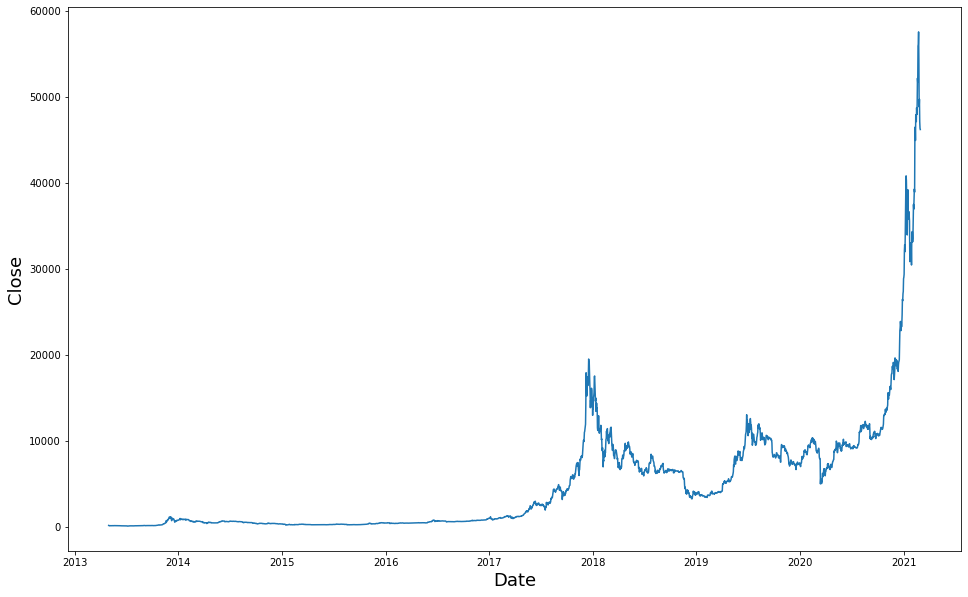

In [6]:
plt.figure(figsize=(16,10))
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close',fontsize=18)
plt.show()

# Dealing with outliers

In [7]:
print(df.shape)
print(df.isnull().sum())
df.describe()


(2862, 7)
SNo          0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64


,SNo,High,Low,Open,Close,Volume,Marketcap
count,2862.00000,2862.000000,2862.000000,2862.000000,2862.000000,2.862000e+03,2.862000e+03
mean,1431.50000,4974.040239,4695.103027,4836.306834,4852.092547,8.978475e+09,8.591622e+10
std,826.33256,7188.836678,6667.197596,6933.573446,6975.105869,1.658135e+10,1.287414e+11
min,1.00000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,716.25000,426.047752,415.675751,421.204506,420.989243,2.786250e+07,5.988997e+09
50%,1431.50000,1197.334961,1164.174988,1180.100037,1182.809998,3.301950e+08,1.924238e+10
75%,2146.75000,8138.046589,7703.357500,7924.612338,7926.696939,1.296743e+10,1.387658e+11
max,2862.00000,58330.572142,55672.609513,57532.738864,57539.943668,3.509679e+11,1.072263e+12


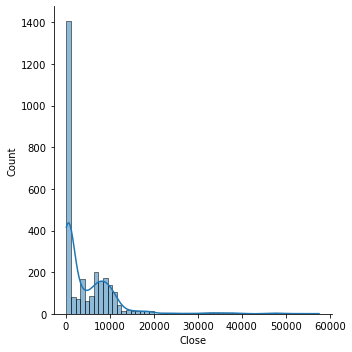

In [8]:
sns.displot(data=df['Close'],kde=True)

In [9]:
q = df['Close'].quantile(0.99)
q1 = df['Close'].quantile(0.1)
data_1=df[df['Close'] < q]
data_1=df[df['Close'] > q1]
data_1.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2.575000e+03,2.575000e+03
mean,1555.597282,5510.391933,5201.327810,5357.762530,5375.348958,9.978226e+09,9.526709e+10
std,770.709807,7387.247539,6844.781676,7121.920052,7165.546640,1.719378e+10,1.324765e+11
min,191.000000,235.268997,221.261993,221.968994,235.143997,0.000000e+00,2.931599e+09
25%,931.500000,575.960510,532.872498,564.161987,565.324982,4.788520e+07,7.294466e+09
50%,1575.000000,3495.174888,3372.120117,3421.910403,3448.117022,1.663280e+09,5.982116e+10
75%,2218.500000,8515.176160,8141.305176,8320.559310,8320.238988,1.532208e+10,1.475876e+11
max,2862.000000,58330.572142,55672.609513,57532.738864,57539.943668,3.509679e+11,1.072263e+12


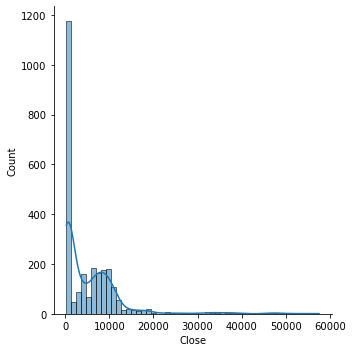

In [10]:
sns.displot(data=data_1['Close'],kde=True)

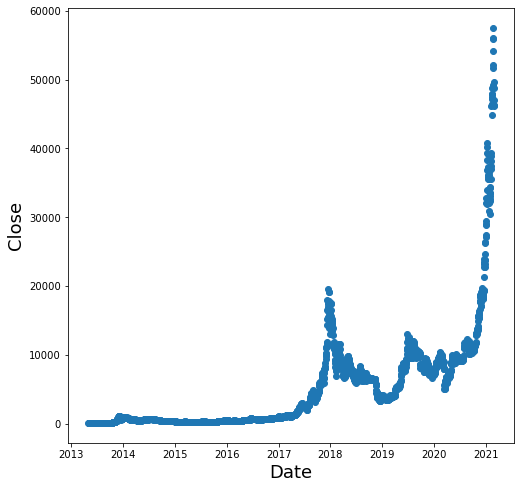

In [11]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.scatter(df.index , df.Close)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close',fontsize=18)
plt.show()


Natural logarithm log is the inverse of the exp(), so that log(exp(x)) = x. The natural logarithm is log in base e.

In [12]:
log_price=np.log(df['Close'])
df['Log_Price']=log_price


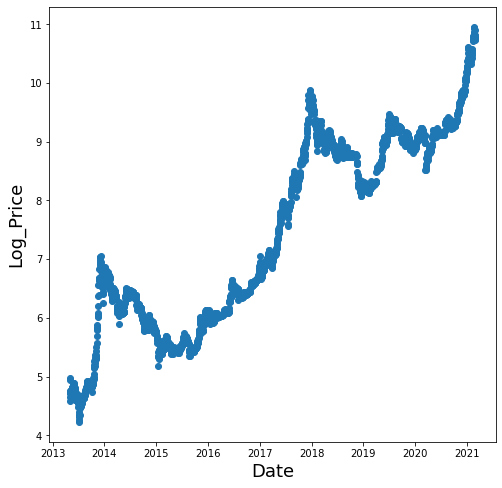

In [13]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.scatter(df.index , df.Log_Price)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Log_Price',fontsize=18)
plt.show()

In [14]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap,Log_Price
count,2862.00000,2862.000000,2862.000000,2862.000000,2862.000000,2.862000e+03,2.862000e+03,2862.000000
mean,1431.50000,4974.040239,4695.103027,4836.306834,4852.092547,8.978475e+09,8.591622e+10,7.427908
std,826.33256,7188.836678,6667.197596,6933.573446,6975.105869,1.658135e+10,1.287414e+11,1.614227
min,1.00000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08,4.225826
25%,716.25000,426.047752,415.675751,421.204506,420.989243,2.786250e+07,5.988997e+09,6.042607
50%,1431.50000,1197.334961,1164.174988,1180.100037,1182.809998,3.301950e+08,1.924238e+10,7.075648
75%,2146.75000,8138.046589,7703.357500,7924.612338,7926.696939,1.296743e+10,1.387658e+11,8.977992
max,2862.00000,58330.572142,55672.609513,57532.738864,57539.943668,3.509679e+11,1.072263e+12,10.960235


# Rearrange 

In [15]:
df.columns.values

array(['SNo', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap',
       'Log_Price'], dtype=object)

In [16]:
cols=['Log_Price', 'Close', 'High', 'Low', 'Open', 'Volume', 'Marketcap'
      ,'SNo']     

data=df[cols]
del data['SNo']
data

,Log_Price,Close,High,Low,Open,Volume,Marketcap
Date,,,,,,,
2013-04-29 23:59:59,4.973556,144.539993,147.488007,134.000000,134.444000,0.000000e+00,1.603769e+09
2013-04-30 23:59:59,4.934474,139.000000,146.929993,134.050003,144.000000,0.000000e+00,1.542813e+09
2013-05-01 23:59:59,4.762088,116.989998,139.889999,107.720001,139.000000,0.000000e+00,1.298955e+09
2013-05-02 23:59:59,4.655958,105.209999,125.599998,92.281898,116.379997,0.000000e+00,1.168517e+09
2013-05-03 23:59:59,4.582413,97.750000,108.127998,79.099998,106.250000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...
2021-02-23 23:59:59,10.795986,48824.426869,54204.929756,45290.590268,54204.929756,1.061025e+11,9.099259e+11
2021-02-24 23:59:59,10.813868,49705.333316,51290.136695,47213.498162,48835.087661,6.369552e+10,9.263931e+11
2021-02-25 23:59:59,10.759898,47093.853019,51948.966982,47093.853019,49709.082425,5.450657e+10,8.777661e+11


# Linear regression

In [17]:
target = data['Log_Price']
inputs = data.drop(['Log_Price'],axis=1)


In [18]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [19]:
inputs_scaled=scaler.transform(inputs)

In [20]:
x_train, x_test, y_train, y_test=train_test_split(inputs_scaled,target,test_size=0.2,random_state=365)

In [21]:
reg=LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

In [22]:
y_hat=reg.predict(x_train)

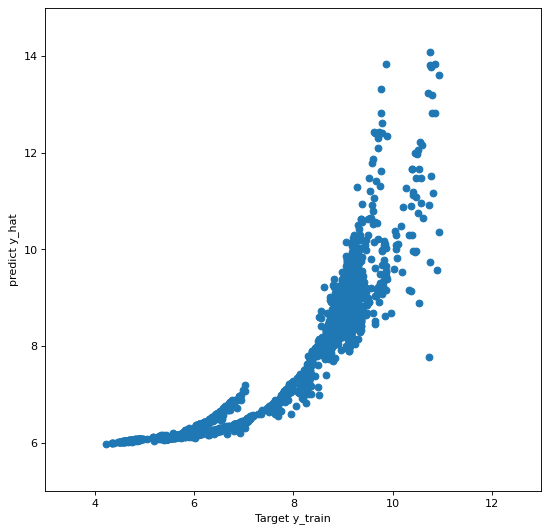

In [23]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(y_train,y_hat)
plt.xlabel('Target y_train')
plt.ylabel('predict y_hat')
plt.xlim(3,13)
plt.ylim(5,15)
plt.show()

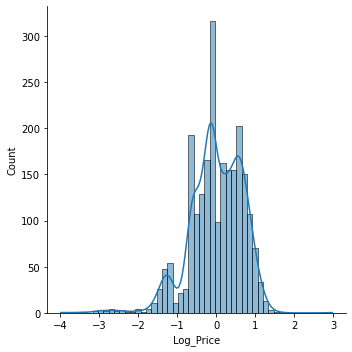

In [24]:

sns.displot(data=y_train-y_hat,kde=True)

# R^2

In [25]:
reg.score(x_train,y_train)

0.8201058861841257

In [26]:
reg.coef_

array([ 21.34737987,  -8.42753158,   6.5650099 ,   1.61924935,
         0.93626197, -20.6000795 ])

1. positive weight shows that as a feature increases in value, so do the log_price and respectively.

2. negative weight shows that as a feature increases in value, log_price and Price decrease.

In [27]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights']=reg.coef_
reg_summary

,Features,Weights
0,Close,21.347380
1,High,-8.427532
2,Low,6.565010
3,Open,1.619249
4,Volume,0.936262
5,Marketcap,-20.600079


In [29]:

import math
data=df.filter(['Close'])


#convert to numpy array
dataset=data.values


#numbers of row to train 
training_data_len=math.ceil(len(dataset)*0.8)

print(training_data_len)
dataset

2290


array([[  144.53999329],
       [  139.        ],
       [  116.98999786],
       ...,
       [47093.85301914],
       [46339.76008289],
       [46188.45127539]])

In [30]:
#scale the data

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data


array([[0.00132429],
       [0.0012279 ],
       [0.00084492],
       ...,
       [0.81823881],
       [0.80511765],
       [0.80248489]])

In [31]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out) #creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]) #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True) #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) #cross validation

    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response

In [32]:
df1=prepare_data(df,'Close',10,0.2)


In [33]:
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,'Close',10,0.2); #calling the method were the cross validation and data preperation is in
learner = LinearRegression() #initializing linear regression model

learner.fit(X_train,Y_train) #training the linear regression model

LinearRegression()

In [34]:

score=learner.score(X_test,Y_test)#testing the linear regression model
forecast= learner.predict(X_lately) #set that will contain the forecasted data
response={}#creting json object
response['test_score']=score
response['forecast_set']=forecast

print(response)

{'test_score': 0.9608554523461812, 'forecast_set': array([54664.20213056, 59124.71900012, 59348.77295056, 60875.51184964,
       57343.18344947, 51637.72746559, 52571.42124535, 49803.45091544,
       49004.16980435, 48843.79398599])}
